In [6]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load  store file as variable
mouse_data = "mouse_drug_data.csv"
clinical_data = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
clinical_data_df = pd.read_csv("clinicaltrial_data.csv")

#clinical_data_df.dtypes

In [7]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv("mouse_drug_data.csv")
#mouse_data_df.dtypes
 

In [8]:
# Combine the data into a single dataset
merge_table = pd.merge(mouse_data_df, clinical_data_df, on="Mouse ID", how="outer")
# Display the data table for preview
merge_table.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [9]:
#merge_table.nunique()
merge_table.Drug.unique()
# Reduce data to just drugs of interest;  Capomulin, Infubinol, Ketapril, and Placebo - direction from John Hixzon for this step
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
reduced_table_df = merge_table.loc[merge_table['Drug'].isin(drugs)]
#reduced_table_df

### Tumor Response to Treatment

In [10]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
tv_mean = pd.DataFrame(reduced_table_df.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]) 
# Preview DataFrame
tv_mean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [11]:
# Store the SEM value of the Tumor Volumes Group by Drug and Timepoint
# Convert to DataFrame
tv_error = pd.DataFrame(reduced_table_df.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]) 
# Preview DataFrame
tv_error.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [12]:
# Minor Data Munging to Re-Format the Data Frames
# Create pivot table and reset index for mean table
tv_mean_pivot = tv_mean.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")

tv_mean_pivot.head()



Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [13]:
# Store the SEM value of the Tumor Volumes Group by Drug and Timepoint
# Create pivot table and reset index for error table
tv_error_pivot = tv_error.pivot_table(index="Timepoint", columns="Drug", values="Tumor Volume (mm3)")
tv_error_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


In [14]:
tv_mean_pivot.dtypes

Drug
Capomulin    float64
Infubinol    float64
Ketapril     float64
Placebo      float64
dtype: object

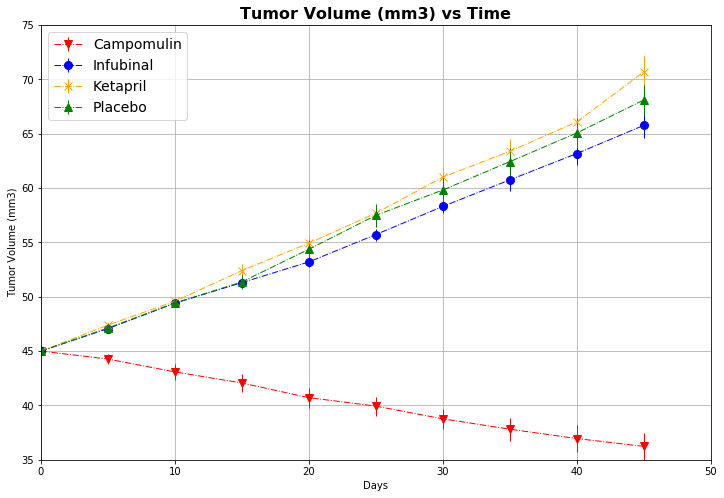

In [15]:
# Generate the Plot for Mean Tumor Volume (with Error Bars)
x =tv_mean_pivot.index
y1 = tv_mean_pivot['Capomulin']
y2 = tv_mean_pivot['Infubinol']
y3 = tv_mean_pivot['Ketapril']
y4 = tv_mean_pivot['Placebo']
ye1 = tv_error_pivot['Capomulin']
ye2 = tv_error_pivot['Infubinol']
ye3 = tv_error_pivot['Ketapril']
ye4 = tv_error_pivot['Placebo']

plt.figure(figsize=(12,8))
# changed from scatterplot to errorbar type based on hint from J. Hixson
plt.errorbar(x, y1, yerr=ye1, color="red", marker="v", markersize=8, linestyle="dashdot", linewidth=1, label='Campomulin')
plt.errorbar(x, y2, yerr=ye2, color="blue", marker="o", markersize=8, linestyle="dashdot", linewidth=1, label='Infubinal')
plt.errorbar(x, y3, yerr=ye3, color="orange", marker="x", markersize=8, linestyle="dashdot", linewidth=1, label='Ketapril')
plt.errorbar(x, y4, yerr=ye4, color="green", marker="^", markersize=8, linestyle="dashdot", linewidth=1, label='Placebo')

# Add formatting and chart elements

plt.title('Tumor Volume (mm3) vs Time', fontsize=16, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.xlim(0, 50)
plt.ylim(35, 75)
plt.legend(loc='best', fontsize=14)
plt.grid(True)

# Save the Figure
#plt.tight_layout()
plt.savefig("Tumor Volume vs Time")
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [16]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
ms_mean = pd.DataFrame(reduced_table_df.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]) 
# Preview DataFrame
ms_mean.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [17]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
ms_error = pd.DataFrame(reduced_table_df.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]) 
# Preview DataFrame
ms_error.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [18]:
# Minor Data Munging to Re-Format the Data Frames
ms_mean_pivot = ms_mean.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")
ms_mean_pivot.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [29]:
# Minor Data Munging to Re-Format the Data Frames
ms_error_pivot = ms_error.pivot_table(index="Timepoint", columns="Drug", values="Metastatic Sites")
ms_error_pivot


# Preview that Reformatting worked

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


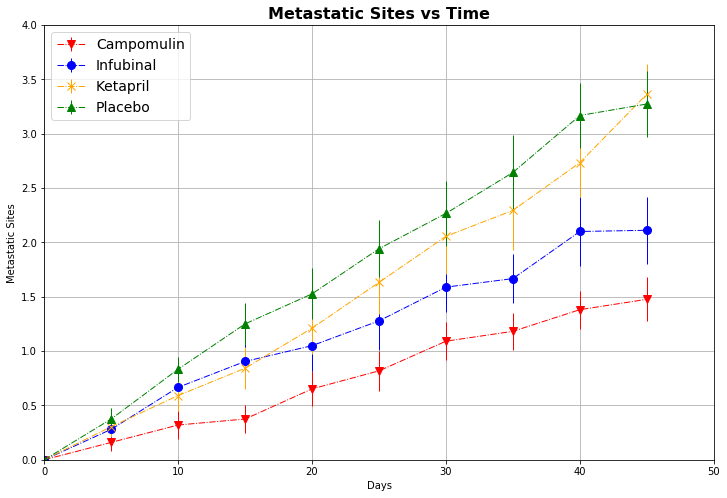

In [20]:
# Generate the Plot (with Error Bars)
x = ms_mean_pivot.index
y1 = ms_mean_pivot['Capomulin']
y2 = ms_mean_pivot['Infubinol']
y3 = ms_mean_pivot['Ketapril']
y4 = ms_mean_pivot['Placebo']
ye1 = ms_error_pivot['Capomulin']
ye2 = ms_error_pivot['Infubinol']
ye3 = ms_error_pivot['Ketapril']
ye4 = ms_error_pivot['Placebo']

plt.figure(figsize=(12,8))
# changed from scatterplot to errorbar type based on hint from J. Hixson
plt.errorbar(x, y1, yerr=ye1, color="red", marker="v", markersize=8, linestyle="dashdot", linewidth=1, label='Campomulin')
plt.errorbar(x, y2, yerr=ye2, color="blue", marker="o", markersize=8, linestyle="dashdot", linewidth=1, label='Infubinal')
plt.errorbar(x, y3, yerr=ye3, color="orange", marker="x", markersize=8, linestyle="dashdot", linewidth=1, label='Ketapril')
plt.errorbar(x, y4, yerr=ye4, color="green", marker="^", markersize=8, linestyle="dashdot", linewidth=1, label='Placebo')

# Add formatting and chart elements

plt.title('Metastatic Sites vs Time', fontsize=16, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Metastatic Sites')
plt.xlim(0, 50)
plt.ylim(0, 4)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
# Save the Figure
#plt.tight_layout()
plt.savefig("Metastic Sites vs Time")
# Show the Figure
plt.show()

## Survival Rates

In [21]:
#Show the number of mice still alive at the end of treatment
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
mice_count = pd.DataFrame(reduced_table_df.groupby(["Drug","Timepoint"]).count()["Mouse ID"]) 

# Preview DataFrame
mice_count.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [22]:
# Minor Data Munging to Re-Format the Data Frames
mice_count_pivot = mice_count.pivot_table(index="Timepoint", columns="Drug", values="Mouse ID")
#mice_count_pivot = mice_count_pivot.reset_index()
# Preview the Data Frame
mice_count_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19
25,22,18,19,17
30,22,17,18,15
35,22,12,17,14
40,21,10,15,12


In [23]:

mice_count_pivot['pct_c'] = round((mice_count_pivot['Capomulin'] / mice_count_pivot['Capomulin'].loc[0]) * 100,0)
mice_count_pivot['pct_i'] = round((mice_count_pivot['Infubinol'] / mice_count_pivot['Infubinol'].loc[0]) * 100,0)
mice_count_pivot['pct_k'] = round((mice_count_pivot['Ketapril'] / mice_count_pivot['Ketapril'].loc[0]) * 100,0)
mice_count_pivot['pct_p'] = round((mice_count_pivot['Placebo'] / mice_count_pivot['Placebo'].loc[0]) * 100,0)
mice_count_pivot

Drug,Capomulin,Infubinol,Ketapril,Placebo,pct_c,pct_i,pct_k,pct_p
Timepoint,,,,,,,,
0,25,25,25,25,100.0,100.0,100.0,100.0
5,25,25,23,24,100.0,100.0,92.0,96.0
10,25,21,22,24,100.0,84.0,88.0,96.0
15,24,21,19,20,96.0,84.0,76.0,80.0
20,23,20,19,19,92.0,80.0,76.0,76.0
25,22,18,19,17,88.0,72.0,76.0,68.0
30,22,17,18,15,88.0,68.0,72.0,60.0
35,22,12,17,14,88.0,48.0,68.0,56.0
40,21,10,15,12,84.0,40.0,60.0,48.0


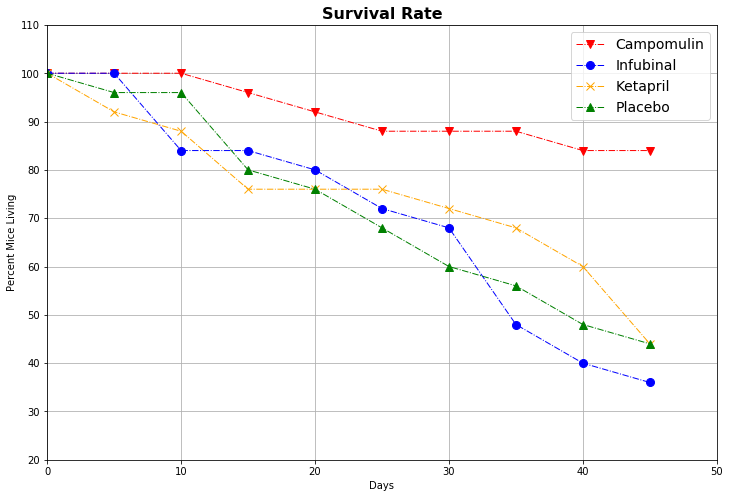

In [24]:
# Generate the Plot (Accounting for percentages)
x = mice_count_pivot.index
y1 = mice_count_pivot['pct_c']
y2 = mice_count_pivot['pct_i']
y3 = mice_count_pivot['pct_k']
y4 = mice_count_pivot['pct_p']

plt.figure(figsize=(12,8))
plt.plot(x, y1, color="red", marker="v", markersize=8, linestyle="dashdot", linewidth=1, label='Campomulin')
plt.plot(x, y2, color="blue", marker="o", markersize=8, linestyle="dashdot", linewidth=1, label='Infubinal')
plt.plot(x, y3, color="orange", marker="x", markersize=8, linestyle="dashdot", linewidth=1, label='Ketapril')
plt.plot(x, y4, color="green", marker="^", markersize=8, linestyle="dashdot", linewidth=1, label='Placebo')

# Add formatting and chart elements

plt.title('Survival Rate', fontsize=16, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Percent Mice Living')
plt.xlim(0, 50)
plt.ylim(20, 110)
plt.legend(loc='best', fontsize=14)
plt.grid(True)
# Save the Figure
plt.savefig("Survival Rates")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [25]:
#Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.
# Calculate the percent changes for each drug
#pctchange_c = 
maxtime = tv_mean_pivot.index.max()
maxtime
drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo',]
pctchanges =[]

for drug in drugs:
    pctchange = round(((tv_mean_pivot[drug][45] - tv_mean_pivot[drug][0])/maxtime)*100,2)
    #pctchanges = pctchanges + (pctchange)
    pctchanges.append(pctchange)
    
# Display the data to confirm
pctchanges

[-19.48, 46.12, 57.03, 51.3]

In [26]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (pctchanges[0],pctchanges[1],pctchanges[2],pctchanges[3])
pct_change_df = pd.DataFrame({"Drug": drugs,"Percent Change": pctchanges})
pct_changes

(-19.48, 46.12, 57.03, 51.3)

NameError: name 'rect' is not defined

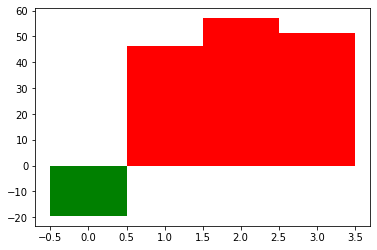

In [28]:
# Splice the data between passing and failing drugs
#plt.figure(figsize=(12,8))
fig, ax=plt.subplots()
interval = np.arange(len(pct_changes)) 
interval

passing = ax.bar(interval[0], pct_changes[0], width=1, align='center', color="green")
failing = ax.bar(interval[1:], pct_changes[1:], width=1, align='center', color="red")

rects = passing[0]

#passingrec[0].get_height()

#for rect in rects:
height = rect.get_height()
ax.text(rect.get_x() + rect.get_width()/2., 3,
               '%d%%' % int(height),
               ha='center', va='bottom', color="white")

#passing_drugs    
    
# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("Tumor Volume Change", fontdict=None, labelpad=None,)
ax.set_title("Tumor Volume % Change", fontdict=None, loc='center')
#ax.setxticks
#ax.setxtickslabels
#ax.setautoscaley_on
#ax.setylim = 
#ax.grid
# Use functions to label the percentages of changes
#ax.text()

# Call functions to implement the function calls
#autolabelpass()
#autolabelfail()pass in failing rec
# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

###  Observations


1. Of the three drugs, Capomulin, Infubinol and Ketapril and the Placebo, only Capomulin decreased tumor volume over the 45 day trial. Tumor volumes for mice on Placebo increased about .5(mm3)/day.  The tumor growth rate for Infubinal and Ketapril were similar to the Placebo rate with Infubinol tumor growth rate slightly lower than the placebo and Ketpril growth rate slightly higher than the placebo. 

2. Over the 45 day trial the total tumer change for each treatment was: Campomulin -19.48%, Infubinol 46.12%, Ketapril 57.03%, and Placebo 51.3%.

3. Metastatic Sites increased with all four treatments.  The rate of increase in metastatic sites for  Ketapril and the Placebo were twice that of Campomulin.

4. All four treatments showed a decrease in their mice population  over the 45 day trial.  The survival rates for Ketapril, Infubinol and Placebo were 44%, 36% and 44% respectively.  The survival rate for Capomulin was considerably better at 88%.
 
 
